In [4]:
%pip install llama-index-multi-modal-llms-gemini
%pip install llama-index-vector-stores-qdrant
%pip install llama-index-embeddings-gemini
%pip install llama-index-llms-gemini

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.7/327.7 kB 13.2 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C
^C
^C


In [1]:
!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

  Using cached qdrant_client-1.14.2-py3-none-any.whl.metadata (10 kB)
  Using cached portalocker-2.10.1-py3-none-any.whl.metadata (8.5 kB)
Using cached qdrant_client-1.14.2-py3-none-any.whl (327 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.8 MB/s eta 0:00:00
Using cached portalocker-2.10.1-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.1/253.1 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 24.0 MB/s eta 0:00:00


*Gemini for Image Understanding from URLs*

In [2]:
%env GOOGLE_API_KEY=...

env: GOOGLE_API_KEY=...


In [3]:
import os
from google.colab import userdata


GOOGLE_API_KEY = userdata.get('google')  # add your GOOGLE API key here
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

*Initialize **GeminiMultiModal** and Load Images from URLs*

In [11]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.core.multi_modal_llms.generic_utils import load_image_urls

image_urls = [
    "https://www.awesomemitten.com/wp-content/uploads/2022/08/Michigan-Stadium-The-Big-House.png",
    # Add more !!!
]

image_documents = load_image_urls(image_urls)

gemini_pro = GeminiMultiModal(model_name="models/gemini-1.5-flash")

<ipython-input-11-3b037acc4986>:12: DeprecationWarning: Call to deprecated class Gemini. (Should use `llama-index-llms-google-genai` instead, using Google's latest unified SDK. See: https://docs.llamaindex.ai/en/stable/examples/llm/google_genai/)
  gemini_pro = GeminiMultiModal(model_name="models/gemini-1.5-flash")


https://www.awesomemitten.com/wp-content/uploads/2022/08/Michigan-Stadium-The-Big-House.png


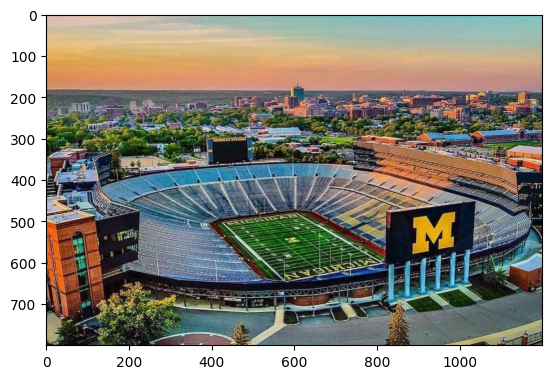

In [12]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

*Complete prompt with image(s)*

In [13]:
complete_response = gemini_pro.complete(
    prompt="Identify the university where this photo was taken and the city where it is present.",
    image_documents=image_documents,
)

In [14]:
print(complete_response)

That's Michigan Stadium, also known as "The Big House".

* **University:** University of Michigan
* **City:** Ann Arbor, Michigan


In [17]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="Give me some more context of the university",
    image_documents=image_documents,
)

In [18]:
for r in stream_complete_response:
    print(r.text, end="")

ThatThat's Michigan Stadium, also known as "The Big House,"  home toThat's Michigan Stadium, also known as "The Big House,"  home to the University of Michigan Wolverines football team.  The image shows the stadium andThat's Michigan Stadium, also known as "The Big House,"  home to the University of Michigan Wolverines football team.  The image shows the stadium and a portion of the University of Michigan's Ann Arbor campus in the background.

Here's some context about the University:

* **University of MichiganThat's Michigan Stadium, also known as "The Big House,"  home to the University of Michigan Wolverines football team.  The image shows the stadium and a portion of the University of Michigan's Ann Arbor campus in the background.

Here's some context about the University:

* **University of Michigan (U-M):**  A public research university located in Ann Arbor, Michigan. It's one of the oldest and most prestigious universities in the UnitedThat's Michigan Stadium, also known as "Th

*Comparing Images*

In [19]:
image_urls = [
    "https://money-assets.money.com/mcp/2024/243744.jpg",
    "https://res.cloudinary.com/highereducation/images/f_auto,q_auto/g_face,c_fill,fl_lossy,q_auto:best,w_448,h_382/v1665751438/OnlineMBA.com/Carnegie-Mellon-campus-sunny-day/Carnegie-Mellon-campus-sunny-day.jpg?_i=AA",
    # ----------------------------------------------------",
]

image_documents_1 = load_image_urls(image_urls)

response_multi = gemini_pro.complete(
    prompt="is there any relationship between those images?",
    image_documents=image_documents_1,
)
print(response_multi)

Yes, there is a relationship between the images.  Both images depict the campuses of prestigious universities:

* **Image 1:** Shows the Stanford University campus in Stanford, California.  The architecture is distinctly Mission Revival style.

* **Image 2:** Shows part of the University of Pittsburgh campus in Pittsburgh, Pennsylvania. The architecture is a mix of styles, but with a more traditional, possibly neoclassical, feel in the central buildings.

The relationship is that both images show the grounds and buildings of major research universities in the United States.  They are both examples of higher education institutions with significant histories and reputations.



https://money-assets.money.com/mcp/2024/243744.jpg


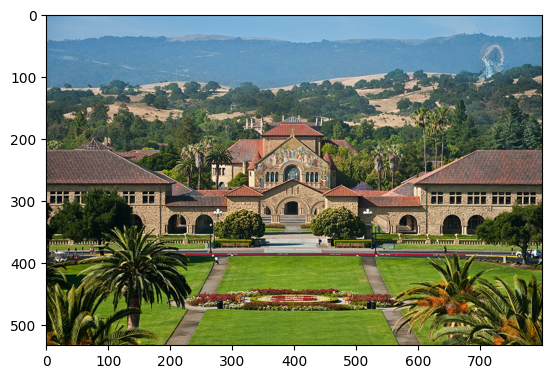

In [23]:
img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)


**Gemini + Pydantic** *for Structured Output Parsing from an Image*

In [24]:
import google.generativeai as genai

genai.configure(
    api_key=GOOGLE_API_KEY,
    client_options={"api_endpoint": "generativelanguage.googleapis.com"},
)

In [25]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-think

In [26]:
from pathlib import Path

input_image_path = Path("google_restaurants")
if not input_image_path.exists():
    Path.mkdir(input_image_path)

In [27]:
!wget "https://docs.google.com/uc?export=download&id=1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg" -O ./google_restaurants/miami.png
!wget "https://docs.google.com/uc?export=download&id=1dYZy17bD6pSsEyACXx9fRMNx93ok-kTJ" -O ./google_restaurants/orlando.png
!wget "https://docs.google.com/uc?export=download&id=1ShPnYVc1iL_TA1t7ErCFEAHT74-qvMrn" -O ./google_restaurants/sf.png
!wget "https://docs.google.com/uc?export=download&id=1WjISWnatHjwL4z5VD_9o09ORWhRJuYqm" -O ./google_restaurants/toronto.png

--2025-04-25 09:36:17--  https://docs.google.com/uc?export=download&id=1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg
Resolving docs.google.com (docs.google.com)... 142.250.101.102, 142.250.101.100, 142.250.101.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg&export=download [following]
--2025-04-25 09:36:17--  https://drive.usercontent.google.com/download?id=1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1800953 (1.7M) [image/png]
Saving to: ‘./google_restaurants/miami.png’

./google_restaurant 100%[===================>]   1.72M  --.-KB/s  

*Pydantic Class for Structured Parser*

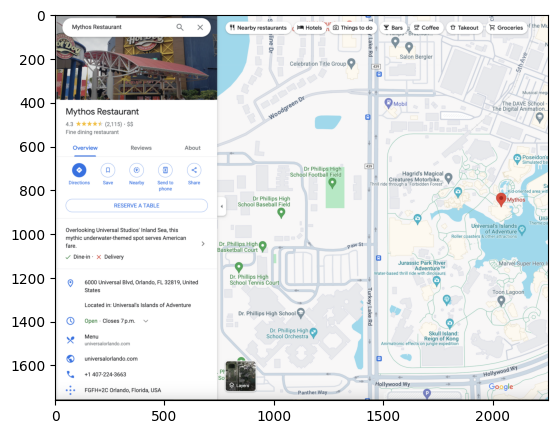

In [28]:
from pydantic import BaseModel
from PIL import Image
import matplotlib.pyplot as plt


class GoogleRestaurant(BaseModel):

    restaurant: str
    food: str
    location: str
    category: str
    hours: str
    price: str
    rating: float
    review: str
    description: str
    nearby_tourist_places: str


google_image_url = "/content/google_restaurants/orlando.png"
image = Image.open(google_image_url).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

In [29]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal
from llama_index.core.program import MultiModalLLMCompletionProgram
from llama_index.core.output_parsers import PydanticOutputParser

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
"""


def pydantic_gemini(
    model_name, output_class, image_documents, prompt_template_str
):
    gemini_llm = GeminiMultiModal(
        api_key=GOOGLE_API_KEY, model_name=model_name
    )

    llm_program = MultiModalLLMCompletionProgram.from_defaults(
        output_parser=PydanticOutputParser(output_class),
        image_documents=image_documents,
        prompt_template_str=prompt_template_str,
        multi_modal_llm=gemini_llm,
        verbose=True,
    )

    response = llm_program()
    return response

In [31]:
from llama_index.core import SimpleDirectoryReader

google_image_documents = SimpleDirectoryReader(
    "./google_restaurants"
).load_data()

results = []
for img_doc in google_image_documents:
    pydantic_response = pydantic_gemini(
        "models/gemini-1.5-flash",
        GoogleRestaurant,
        [img_doc],
        prompt_template_str,
    )
    # only output the results for miami for example along with image
    if "orlando" in img_doc.image_path:
        for r in pydantic_response:
            print(r)
    results.append(pydantic_response)

<ipython-input-29-509c8e7bc5f2>:14: DeprecationWarning: Call to deprecated class Gemini. (Should use `llama-index-llms-google-genai` instead, using Google's latest unified SDK. See: https://docs.llamaindex.ai/en/stable/examples/llm/google_genai/)
  gemini_llm = GeminiMultiModal(


> Raw output: ```json
{
  "restaurant": "La Mar by Gaston Acurio",
  "food": "Peruvian & fusion",
  "location": "500 Brickell Key Dr, Miami, FL 33131",
  "category": "South American restaurant",
  "hours": "Opens 6PM. Closes 11 PM",
  "price": "$$$",
  "rating": 4.4,
  "review": "Chic waterfront offering Peruvian & fusion fare, plus bars for cocktails, ceviche & anticuchos.",
  "description": "Chic waterfront offering Peruvian & fusion fare, plus bars for cocktails, ceviche & anticuchos.",
  "nearby_tourist_places": "Brickell Key area with scenic views"
}
```

> Raw output: ```json
{
  "restaurant": "Mythos Restaurant",
  "food": "American fare",
  "location": "6000 Universal Blvd, Orlando, FL 32819, United States",
  "category": "Restaurant",
  "hours": "Open: 7 p.m. Islands of Adventure",
  "price": "$$",
  "rating": 4.3,
  "review": "Overlooking Universal Studios/Island, this mythic underwater themed spot serves American fare.",
  "description": "Dine-in • Delivery",
  "nearby_touri

*Building Multi-Modal RAG for restaurant recommendation*

In [32]:
from llama_index.core.schema import TextNode

nodes = []
for res in results:
    text_node = TextNode()
    metadata = {}
    for r in res:
        # set description as text of TextNode
        if r[0] == "description":
            text_node.text = r[1]
        else:
            metadata[r[0]] = r[1]
    text_node.metadata = metadata
    nodes.append(text_node)

In [33]:
! pip install llama-index-vector-stores-qdrant llama-index-readers-file llama-index-embeddings-fastembed

  Using cached llama_index_vector_stores_qdrant-0.6.0-py3-none-any.whl.metadata (718 bytes)
Using cached llama_index_vector_stores_qdrant-0.6.0-py3-none-any.whl (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.8/324.8 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
!pip install llama-index-embeddings-gemini

In [42]:
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.embeddings.gemini import GeminiEmbedding
from llama_index.llms.gemini import Gemini
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import Settings
from llama_index.core import StorageContext
import qdrant_client


# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_gemini_4_lat")

vector_store = QdrantVectorStore(client=client, collection_name="collection")

# Using the embedding model to Gemini
Settings.embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_API_KEY
)
Settings.llm = Gemini(api_key=GOOGLE_API_KEY, model="models/gemini-1.5-pro")

storage_context = StorageContext.from_defaults(vector_store=vector_store)

index = VectorStoreIndex(
    nodes=nodes,
    storage_context=storage_context,
)

<ipython-input-42-820d4c034129>:16: DeprecationWarning: Call to deprecated class GeminiEmbedding. (Should use `llama-index-embeddings-google-genai` instead, using Google's latest unified SDK. See: https://docs.llamaindex.ai/en/stable/examples/embeddings/google_genai/)
  Settings.embed_model = GeminiEmbedding(
<ipython-input-42-820d4c034129>:19: DeprecationWarning: Call to deprecated class Gemini. (Should use `llama-index-llms-google-genai` instead, using Google's latest unified SDK. See: https://docs.llamaindex.ai/en/stable/examples/llm/google_genai/)
  Settings.llm = Gemini(api_key=GOOGLE_API_KEY, model="models/gemini-1.5-pro")
/usr/local/lib/python3.11/dist-packages/llama_index/vector_stores/qdrant/base.py:703: UserWarning: Payload indexes have no effect in the local Qdrant. Please use server Qdrant if you need payload indexes.
  self._client.create_payload_index(


*Gemini for result generation and user recommendation*

In [44]:
query_engine = index.as_query_engine(
    similarity_top_k=1,
)

response = query_engine.query(
    "recommend a San Francisco restaurant for me and its nearby tourist places"
)
print(response)

Sam's Grill & Seafood Restaurant is a seafood restaurant located at 374 Bush St, San Francisco. It offers a modern ambiance with a patio and happy hour.  Nearby tourist attractions include Chinatown and Union Square.

